<div style="background-color:#3b5998; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b>MENTAL HEALTH IN TECH EDA 💙 </b></h1>
</div>

<div style="background-color:#ffffff; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <img src="https://media.tenor.com/0wc2vfwBtE8AAAAd/arabic.gif" alt="Animated GIF">
</div>

In [1]:
!pip3 install -q wordcloud seaborn

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [2]:
import os
import gc
import re
import warnings
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from wordcloud import WordCloud
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/kaggle/input/mental-health-in-tech-2014/survey_2014.csv')
data.shape

(1259, 27)

In [4]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>QUICK EDA</b></h2>
</div>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1259.0,7.942815e+07,2.818299e+09,-1726.0,27.0,31.0,36.0,1.000000e+11


In [7]:
data.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [8]:
gender_clean = {
    "female":"Female",
    "male":"Male",
    "Male":"Male",
    "male-ish":"Male",
    "maile":"Male",
    "trans-female":"Female",
    "cis female":"Female",
    "f":"Female",
    "m":"Male",
    "M":"Male",
    "something kinda male?":"Male",
    "cis male":"Male",
    "woman":"Female",
    "mal":"Male",
    "male (cis)":"Male",
    "queer/she/they":"Female",
    "non-binary":"Unspecified",
    "femake":"Female",
    "make":"Male",
    "nah":"Unspecified",
    "all":"Unspecified",
    "enby":"Unspecified",
    "fluid":"Unspecified",
    "genderqueer":"Unspecified",
    "androgyne":"Unspecified",
    "agender":"Unspecified",
    "cis-female/femme":"Female",
    "guy (-ish) ^_^":"Male",
    "male leaning androgynous":"Male",
    "man":"Male",
    "male ":"Male",
    "trans woman":"Female",
    "msle":"Male",
    "neuter":"Unspecified",
    "female (trans)":"Female",
    "queer":"Unspecified",
    "female (cis)":"Female",
    "mail":"Male",
    "a little about you":"Unspecified",
    "malr":"Male",
    "p":"Unspecified",
    "femail":"Female",
    "cis man":"Male",
    "ostensibly male, unsure what that really means":"Male",
    "female ":"Female",
    "Female":"Female",
    "Male-ish":"Male"
}
data.Gender = data.Gender.str.lower()
data.Gender = data.Gender.apply(lambda x: gender_clean[x])

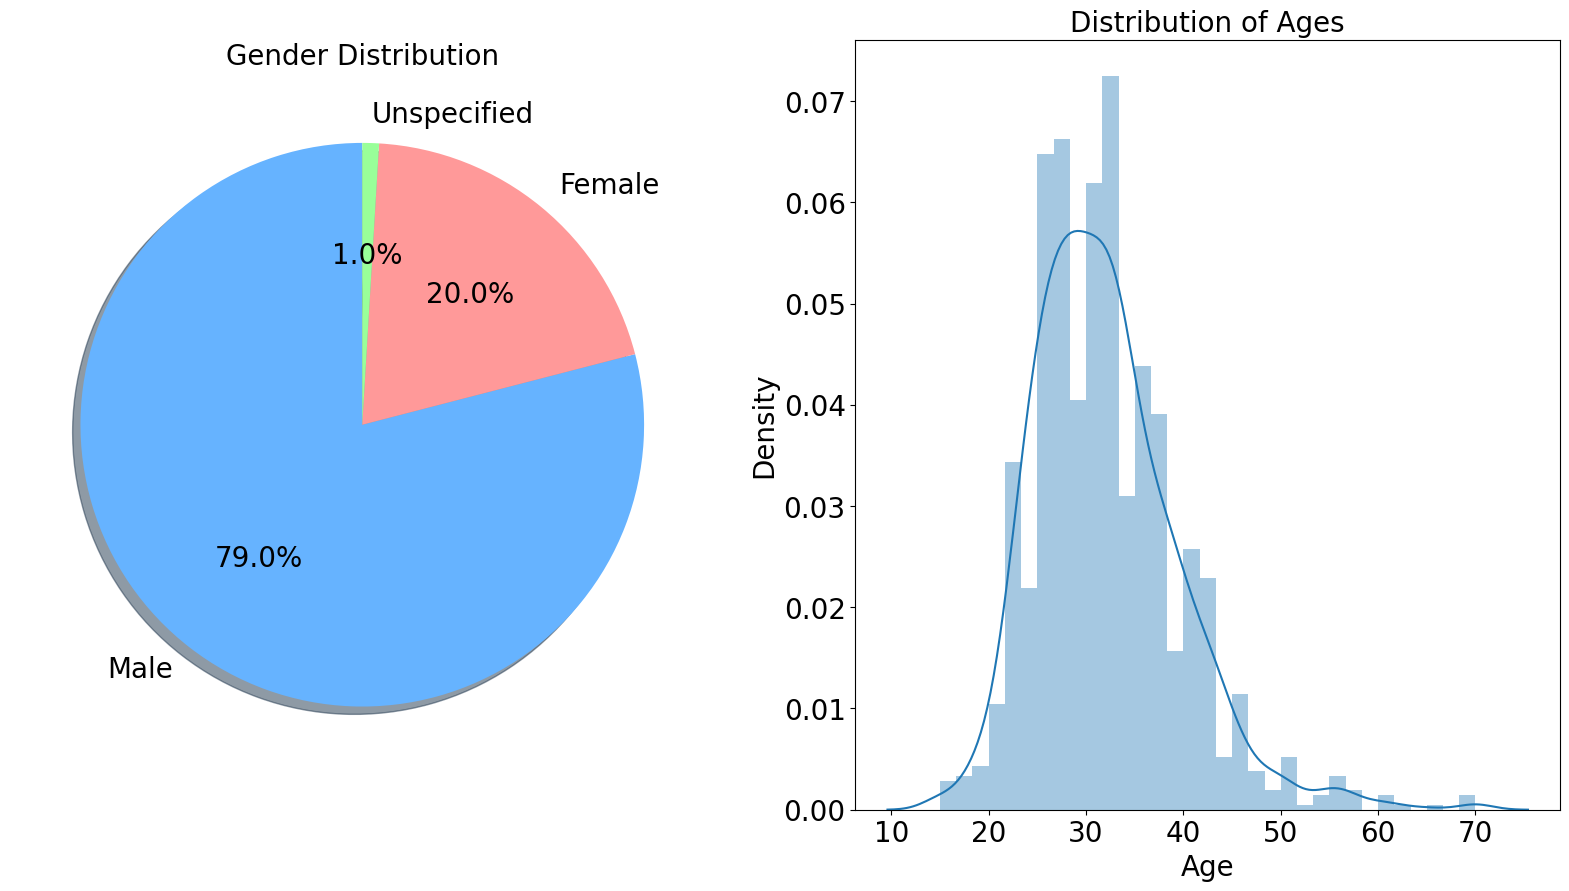

In [9]:
## Some basic employment statistics
#Distribution on the basis of **Gender**. (Need more women in tech...surprised,eh?)
#How does the age vary in the professional industry?

f, ax = plt.subplots(1,2, figsize=(20,10))
ax1 = ax[0].pie(list(data['Gender'].value_counts()), 
                   labels=['Male','Female','Unspecified'],
                  autopct='%1.1f%%', shadow=True, startangle=90,
             colors=['#66b3ff','#ff9999','#99ff99'])
ax[0].set_title("Gender Distribution")
ax[1].set_title("Distribution of Ages")
ax2 = sns.distplot(data.Age.clip(15,70), ax=ax[1])

In [10]:
#Extraction of basic stats from all numeric columns
pd.DataFrame(data.Age.clip(15,60).describe())

,Age
count,1259.000000
mean,32.023828
std,7.374455
min,15.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,60.000000


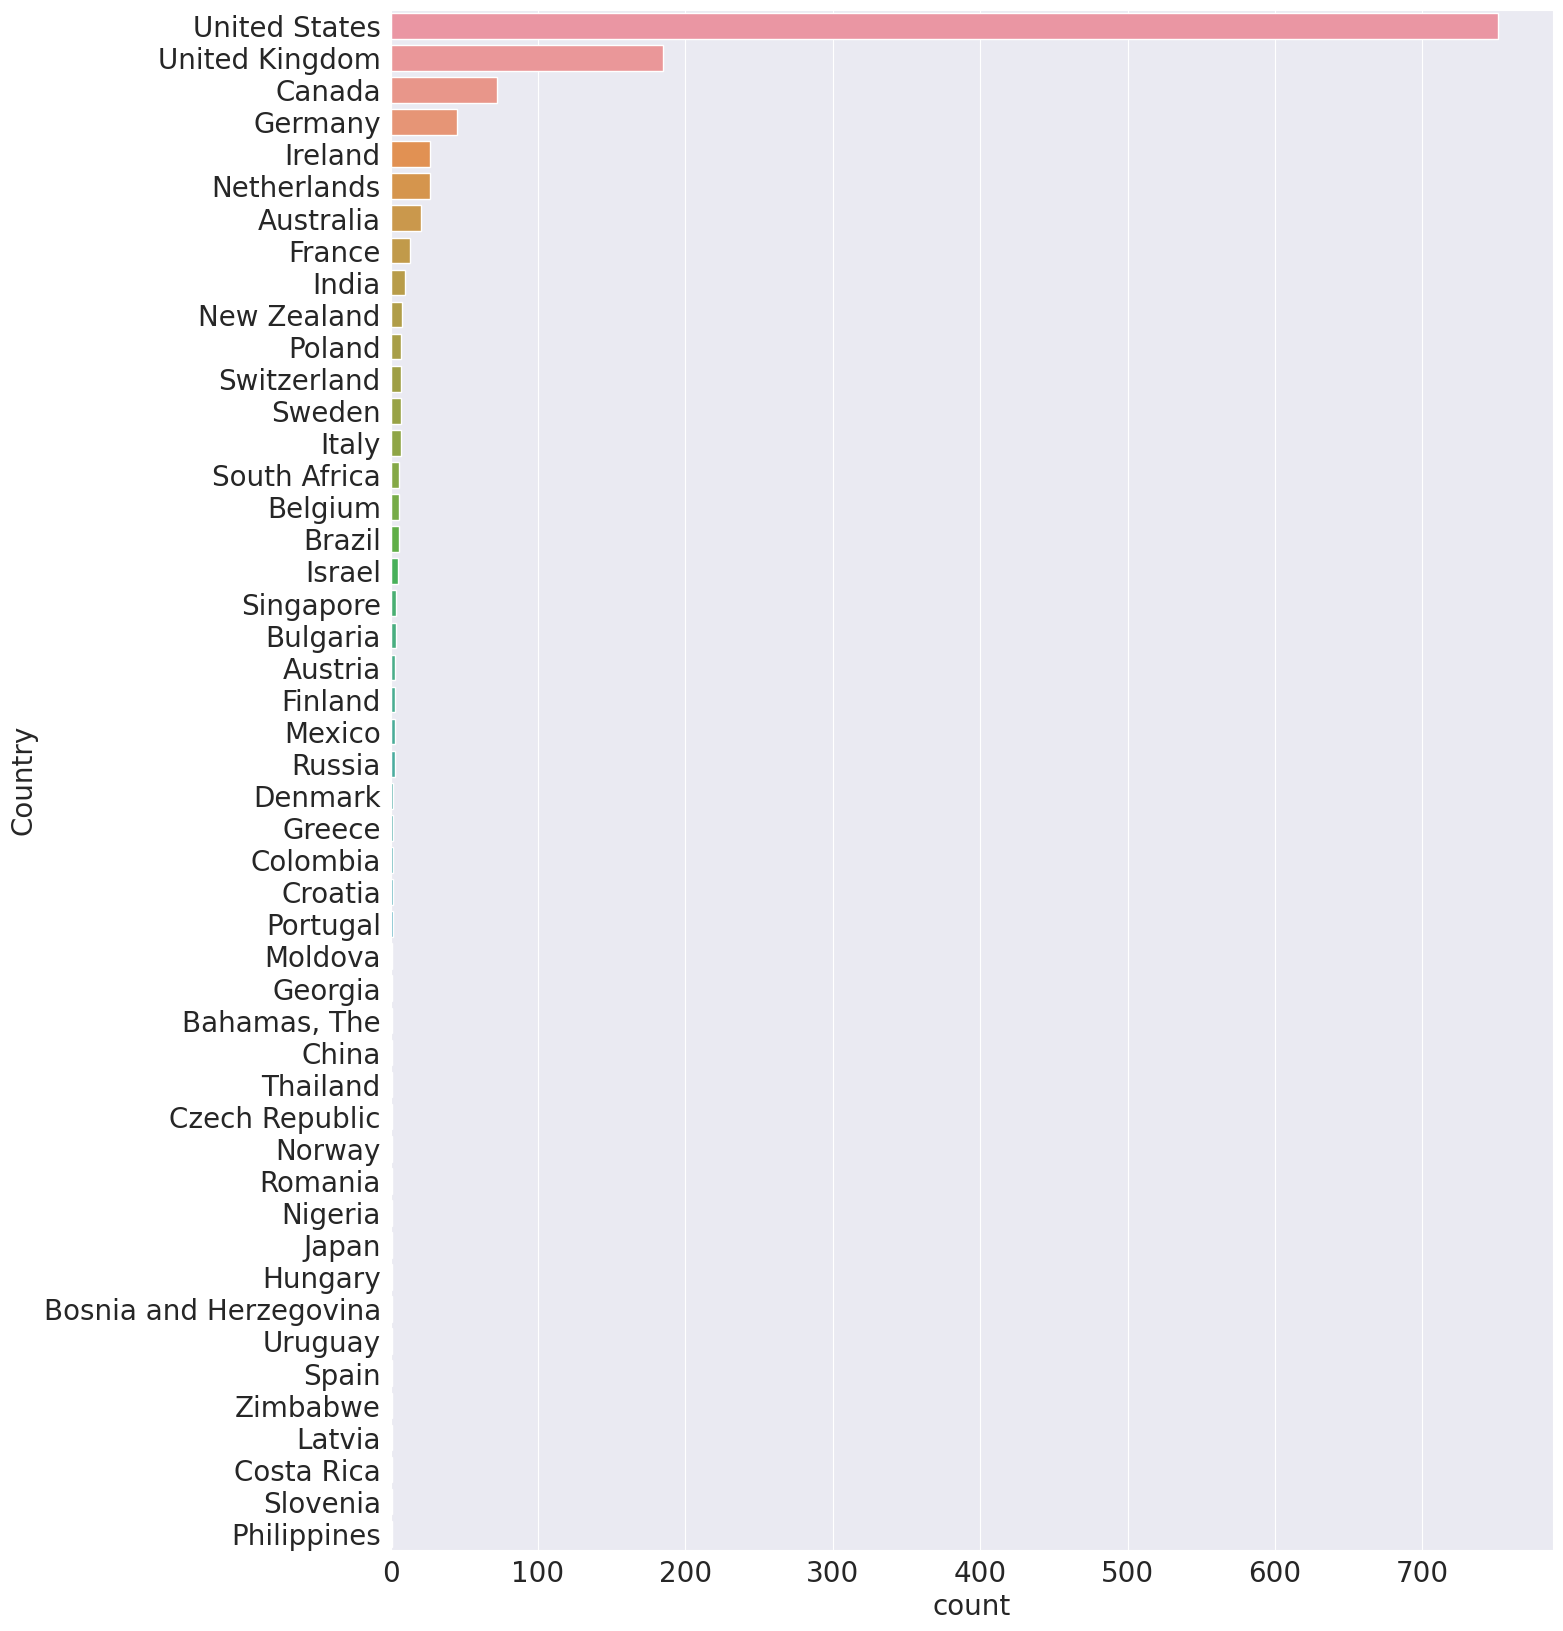

In [11]:
## Participation in the Survery - by Country
'''
Although, the United States dominates this category it would've been great if developing nations such as **India**, **Russia** & **Israel** had more participants since little is known about the working conditions in these countries & health issues that working professionals from these countries face.

Another thing, due to this extreme domination of the US in this survey, it has kind-of rendered it useless to do a country-wise analysis since there are *<50* participants from a majority of the countries.
'''
sns.set_style("darkgrid")
plt.figure(figsize=(15,20))
sns.countplot(y='Country', data=data, 
              orient='h', order=data.Country.value_counts().index)
plt.show()

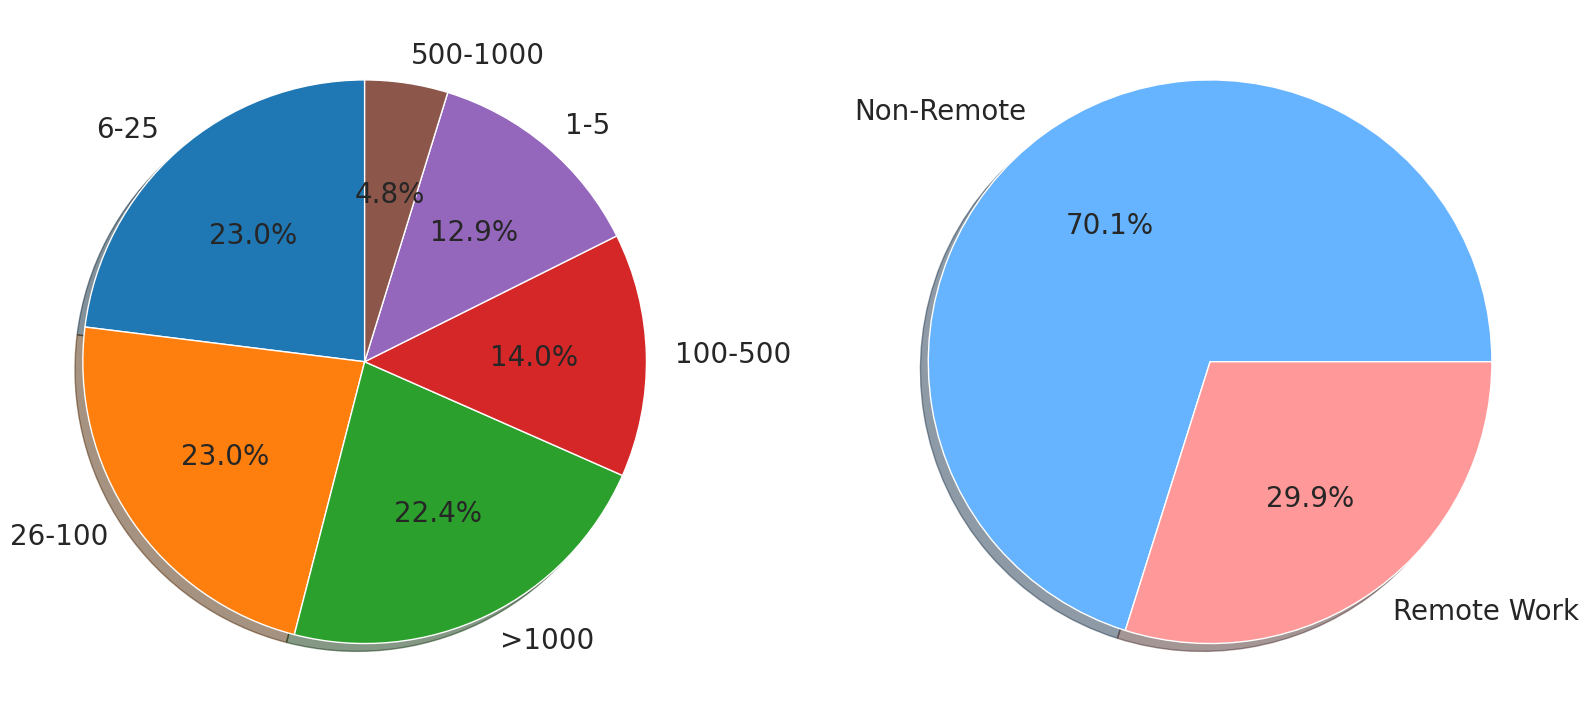

In [12]:
## How big/small is your company?
"""
About 75% of the employees belong to the companies with less than 500 employees deeming them as very small ventures. Quite typical of the tech-industry.
"""
f, ax = plt.subplots(1,2, figsize=(20,10))
patches, texts, autotexts = ax[0].pie(list(data['no_employees'].value_counts()), 
                   labels=['6-25', '26-100', '>1000', '100-500', '1-5', '500-1000'],
                  autopct='%1.1f%%', shadow=True, startangle=90)
new = ax[1].pie(list(data['remote_work'].value_counts()),
                                     labels=['Non-Remote', 'Remote Work'],
                                     autopct='%1.1f%%', shadow=True, startangle=0,
                                        colors=['#66b3ff','#ff9999'])

Text(0, 0.5, '# Reponses')

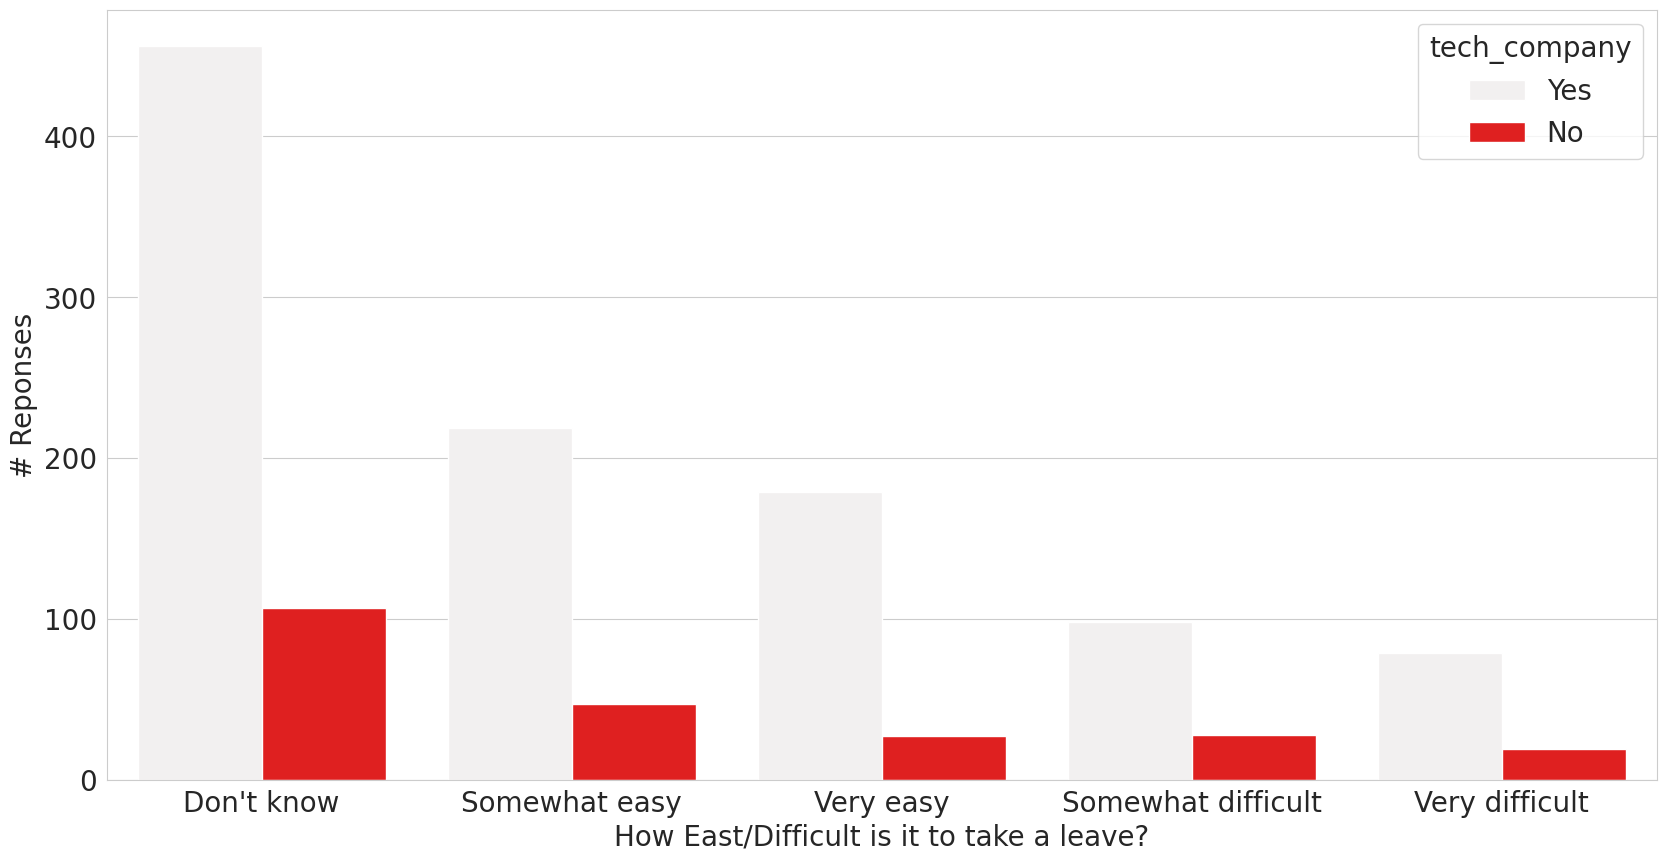

In [13]:
## How easy/difficult is it to take a leave?
'''
This one caught me by surprise. Nearly *40%* of the total respondents are unsure about their company's policies on taking leaves.
The trend is consistent quite consistent in Tech-NonTech companies, and with both Males & Females.
'''
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(x='leave', data=data, order=data.leave.value_counts().index, 
              hue='tech_company', color='r')
plt.xlabel("How East/Difficult is it to take a leave?")
plt.ylabel("# Reponses")

In [14]:
# Let's explore some Company Policies & their correlation

"""
I'm taking the following columnar attributes as an indicator of the company policies towards their employees (all of them take binary values i.e. Yes/No) --

1. Treatment 
2. Benefits 
3. Care Options
4. Wellness Program (whether it exists or not)

Since all of these are categorical in nature, in order to calculate their correlation, we must **factorize** them to convert them to numeric. `pd.factorize` of Pandas comes in handy to this cause.
"""
company_characs = [
    "treatment",
    "benefits",
    "care_options",
    "wellness_program",
]

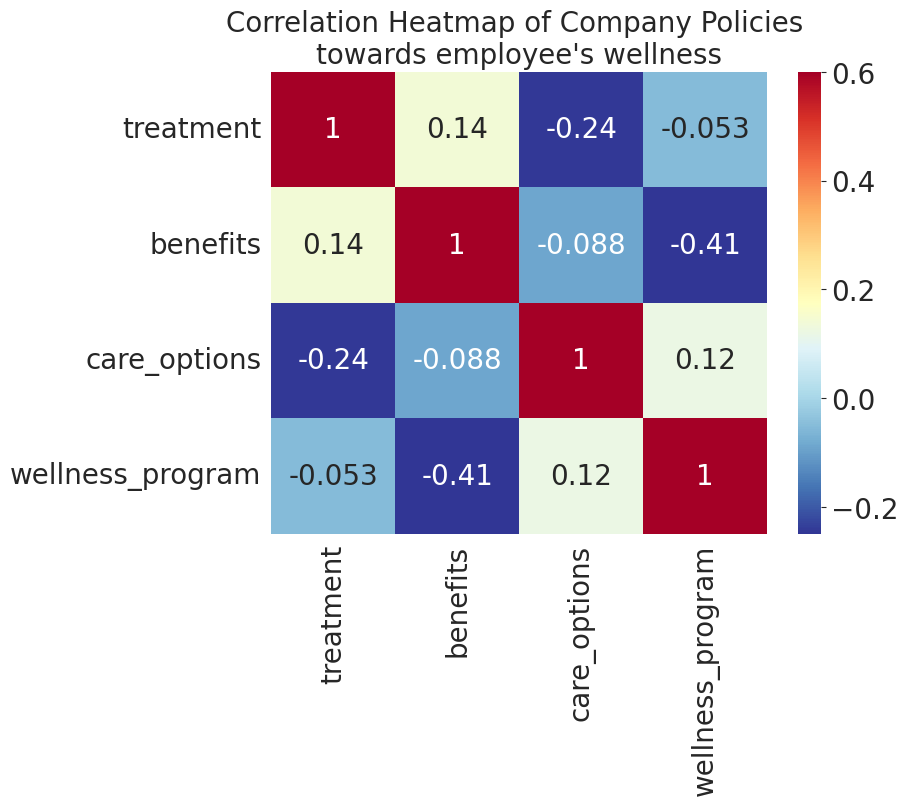

In [15]:
sns.set_style("darkgrid")
company_chars_corr = data[company_characs].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', 
                                                                            min_periods=1)
plt.figure(figsize = (8, 6))
# Heatmap of correlations
sns.heatmap(company_chars_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap of Company Policies \ntowards employee's wellness");

In [16]:
# Well Being Indicators
"""
There are also certain binary attributes in this dataset that help describe the state of well being of an individual, namely -- 

1. Seeking Help 
2. Mental Health Consequences (due to job)
3. Physical Health Consequences (due to job)
4. Observed Consequences
5. Mental Health Interview

All of these are also categorical in nature so we simply factorize them as before."""
wellbeing_indicators = [
    'seek_help',
    'mental_health_consequence',
    'obs_consequence',
    'mental_health_interview',
    'phys_health_consequence'
]

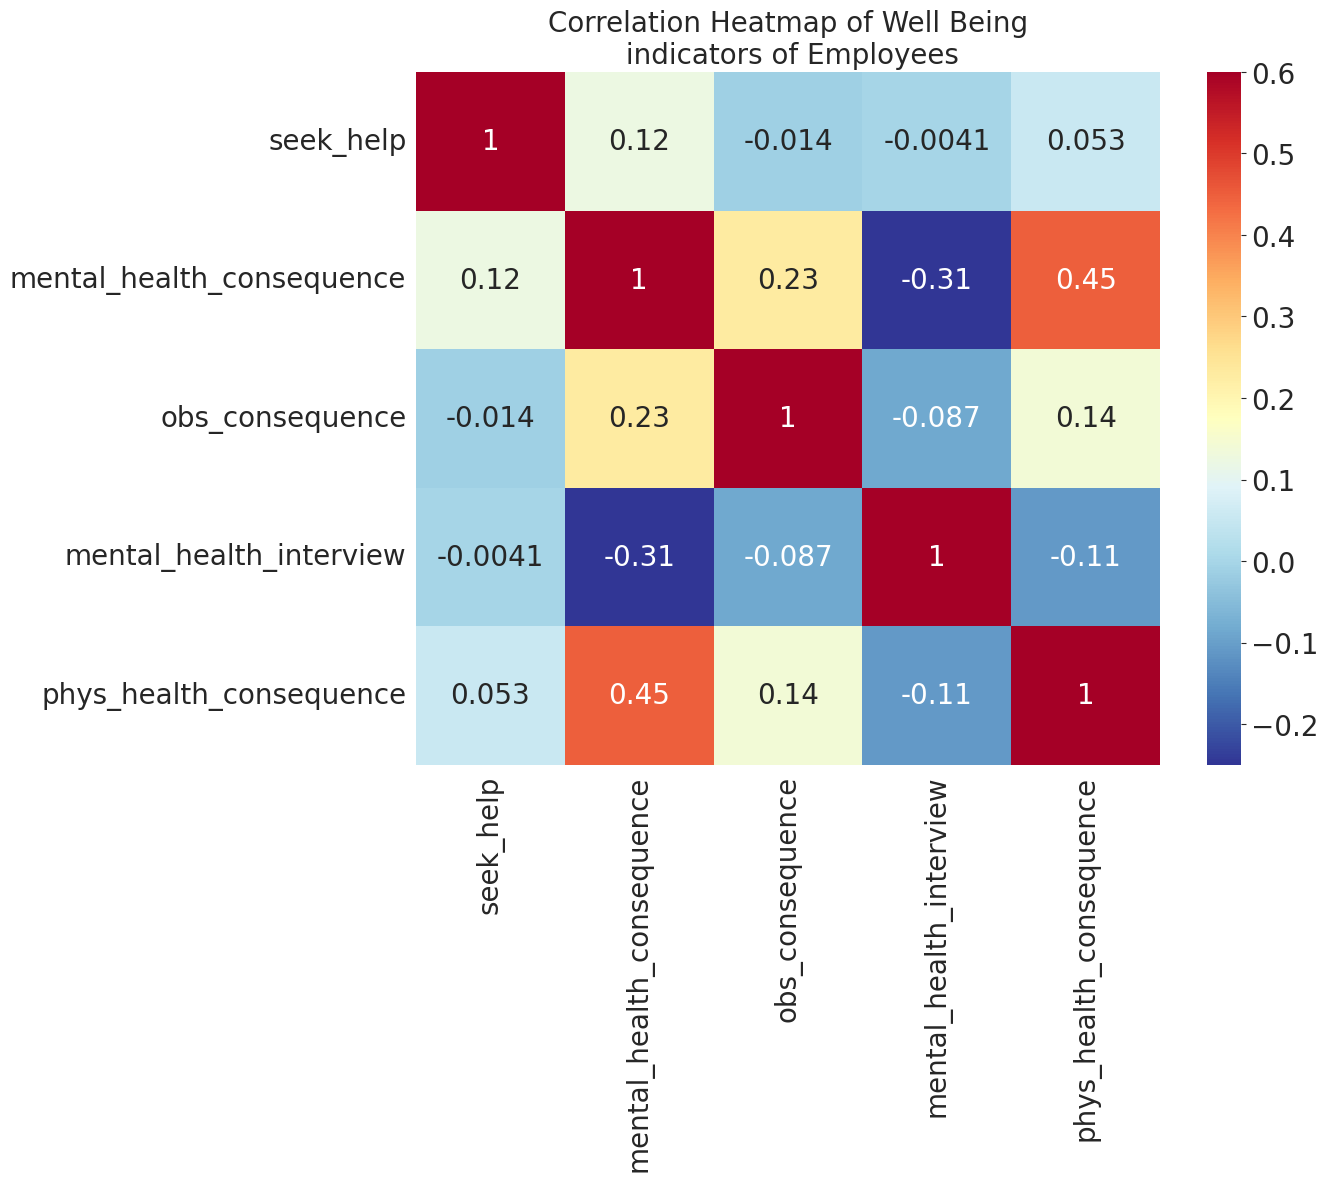

In [17]:
wellbeing_indicators_corr = data[wellbeing_indicators].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', 
                                                                            min_periods=1)
plt.figure(figsize = (12, 9))
# Heatmap of correlations
sns.heatmap(wellbeing_indicators_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap of Well Being\n indicators of Employees");

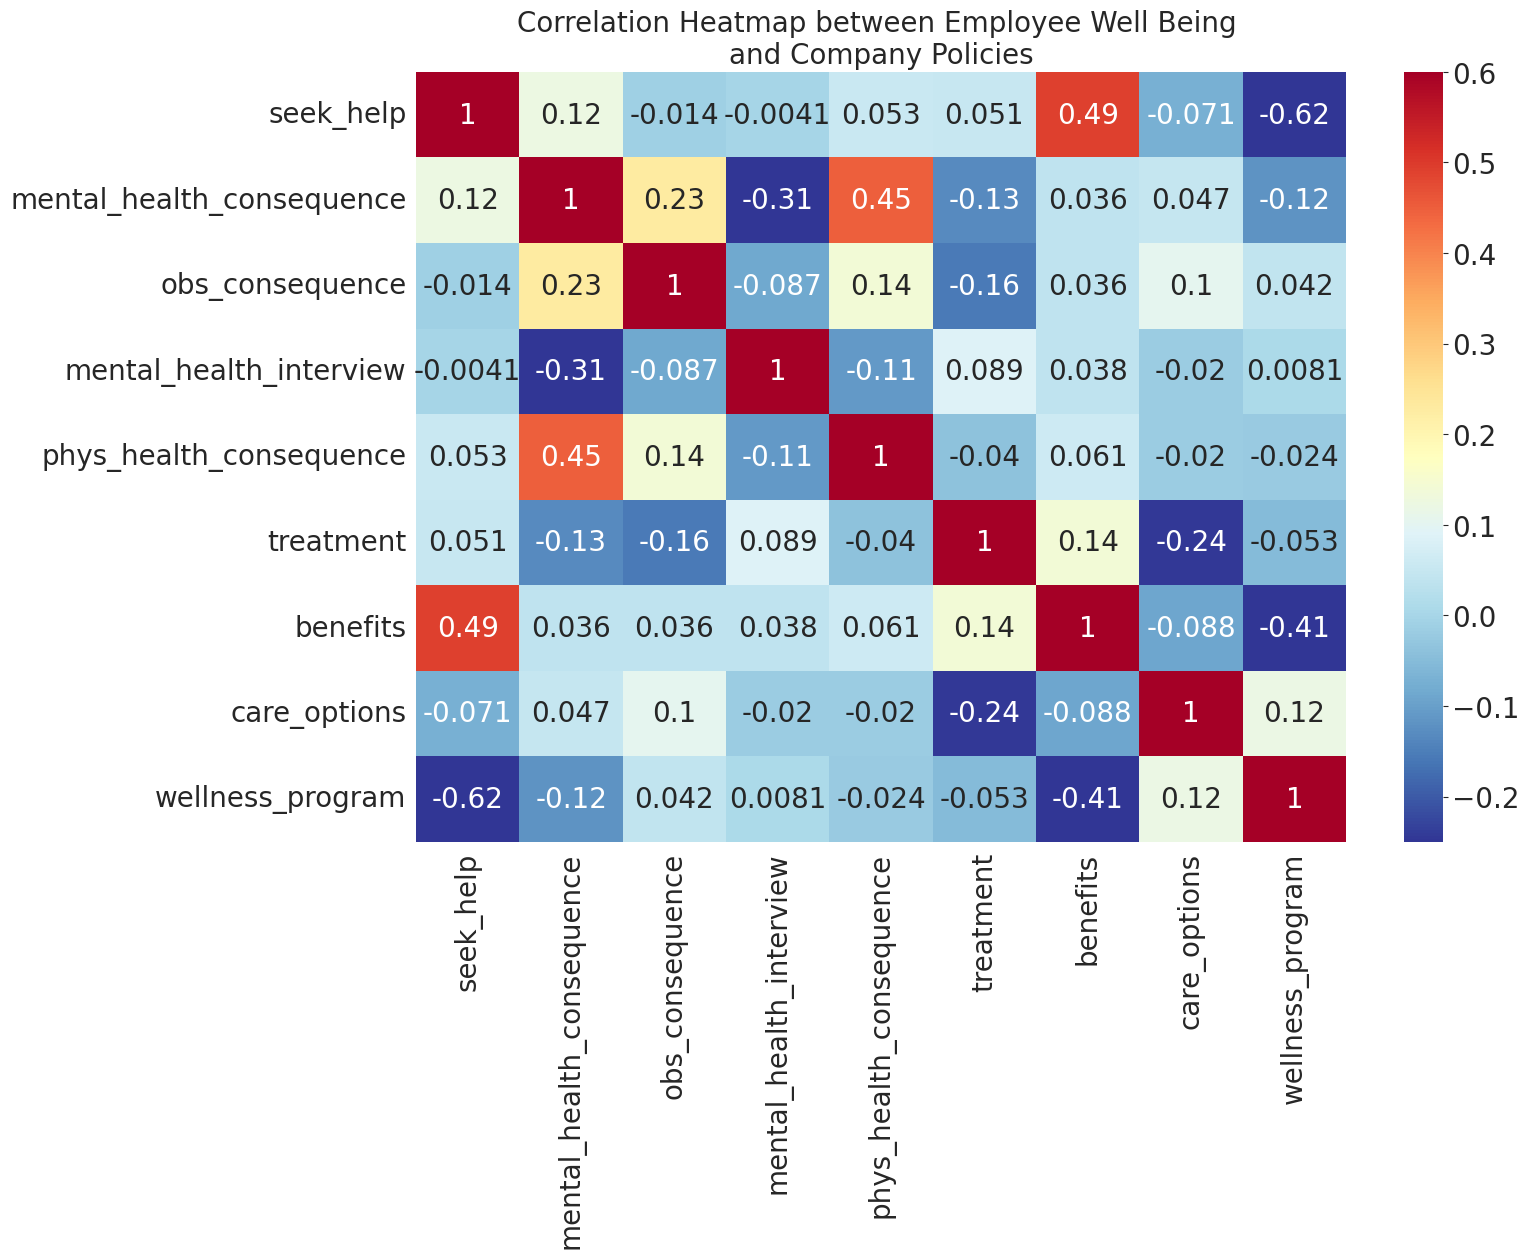

In [18]:
# How do company policies relate to their employee's well-being?
"""
Here, we simple put together the features indicating company policies with those indicating the overall well-being of the employee. The results are also quite interesting, if you look closely
"""
wellbeing_policy_corr = data[wellbeing_indicators + company_characs].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize = (15,10))
# Heatmap of correlations
sns.heatmap(wellbeing_policy_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap between Employee Well Being \nand Company Policies");

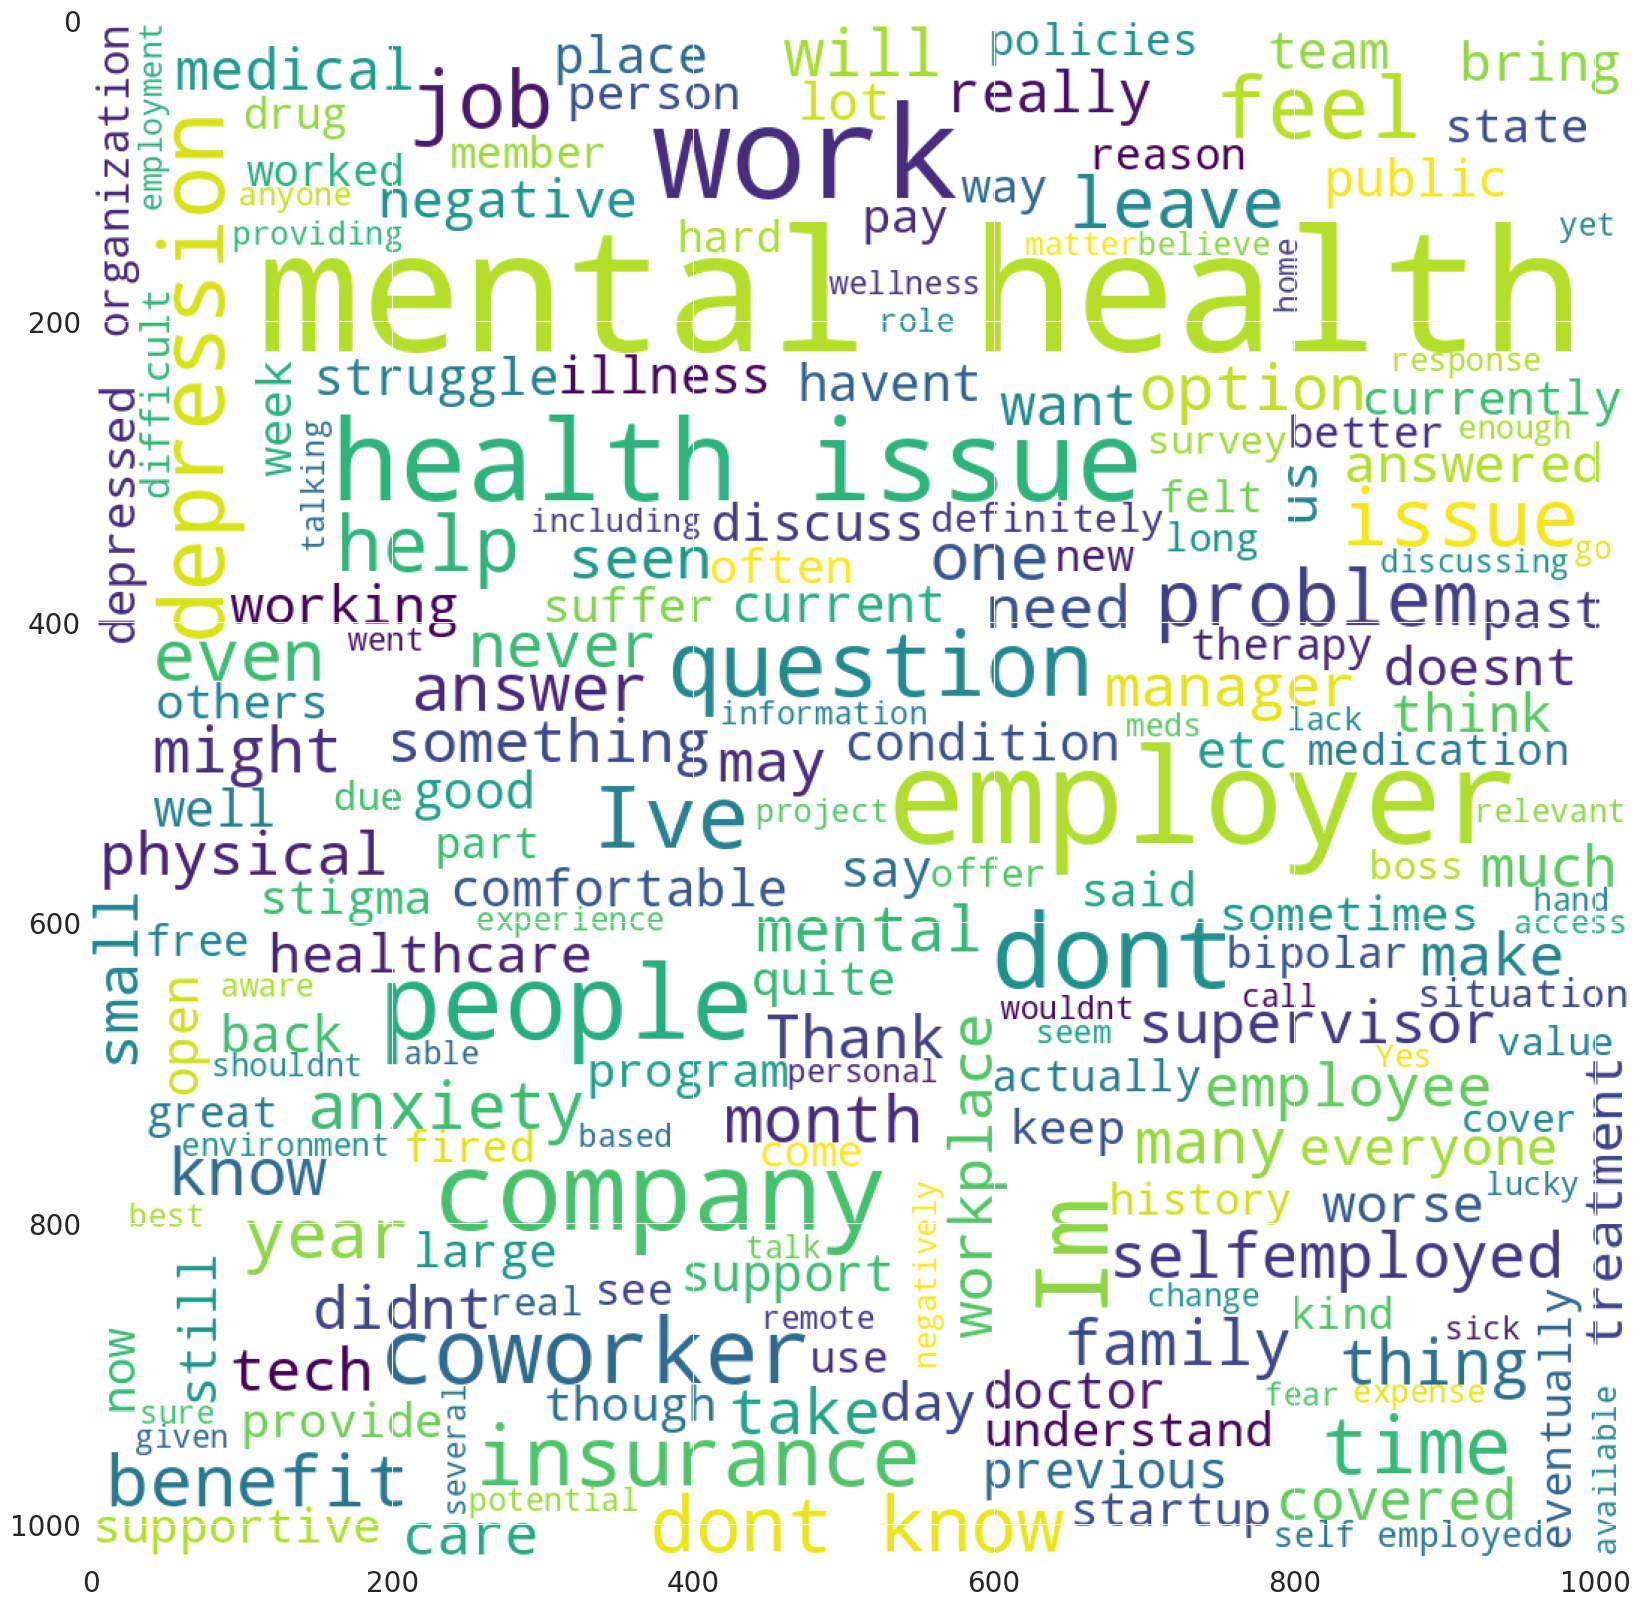

In [19]:
# A (Powerful) Wordcloud
"""
A word cloud of what the employees have to say in regard to this issue of Mental Health!
"""
plt.figure(figsize=(20,20))
wordcloud = WordCloud(
    background_color='white',
    width=1024,
    height=1024,
).generate(re.sub(r'[^\w\s]',''," ".join(list(data.comments.unique()[1:]))))
plt.imshow(wordcloud);